In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# We check for null values and drop it if there is any.

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace = True)

We look at the data types of the column variables.

In [6]:
for column in df:
    print(f'{column}: {df[column].dtypes}')

Airline: object
Date_of_Journey: object
Source: object
Destination: object
Route: object
Dep_Time: object
Arrival_Time: object
Duration: object
Total_Stops: object
Additional_Info: object
Price: int64


We would now check the unique values of various data types which will help us to encode them.

In [7]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [8]:
print_unique_col_values(df)

Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey: ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route: ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG 

In [9]:
df.drop(['Route','Additional_Info'],axis =1,inplace = True)

We now the map the object values to numerical values which will help us to run algorithms.

In [10]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [11]:
df.replace('Delhi','New Delhi',inplace=True)

In [12]:
df['Destination'] = df['Destination'].map({'New Delhi':0,'Banglore':1,'Cochin':2,'Kolkata':3,'Hyderabad':4})

In [13]:
df['Source'] = df['Source'].map({'New Delhi':0,'Banglore':1,'Mumbai':2,'Kolkata':3,'Chennai':4})

In [14]:
df['Airline'] = df['Airline'].map({'IndiGo':0, 'Air India':1, 'Jet Airways':2, 'SpiceJet':3, 'Multiple carriers':4, 'GoAir':5,
 'Vistara':6, 'Air Asia':7, 'Vistara Premium economy':8, 'Jet Airways Business':9,'Multiple carriers Premium economy':10,'Trujet':11})

In [15]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [16]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [17]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,1,0,2h 50m,0,3897,24,3,22,20,1,10
1,1,3,1,7h 25m,2,7662,1,5,5,50,13,15
2,2,0,2,19h,2,13882,9,6,9,25,4,25
3,0,3,1,5h 25m,1,6218,12,5,18,5,23,30
4,0,1,0,4h 45m,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,3,1,2h 30m,0,4107,9,4,19,55,22,25
10679,1,3,1,2h 35m,0,4145,27,4,20,45,23,20
10680,2,1,0,3h,0,7229,27,4,8,20,11,20
10681,6,1,0,2h 40m,0,12648,1,3,11,30,14,10


In [20]:
df['Duration'][1].split()

['7h', '25m']

In [21]:
df['Duration'][2].strip()

'19h'

In [22]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df.drop(["Duration"], axis = 1, inplace = True)

In [24]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,1,0,0,3897,24,3,22,20,1,10,2,50
1,1,3,1,2,7662,1,5,5,50,13,15,7,25
2,2,0,2,2,13882,9,6,9,25,4,25,19,0
3,0,3,1,1,6218,12,5,18,5,23,30,5,25
4,0,1,0,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,3,1,0,4107,9,4,19,55,22,25,2,30
10679,1,3,1,0,4145,27,4,20,45,23,20,2,35
10680,2,1,0,0,7229,27,4,8,20,11,20,3,0
10681,6,1,0,0,12648,1,3,11,30,14,10,2,40


In [25]:
y = df['Price']
x = df.drop('Price',axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
y_pred = reg_rf.predict(x_test)

In [29]:
reg_rf.score(x_train, y_train)

0.9538097595606838

In [30]:
reg_rf.score(x_test, y_test)

0.794361897123955

In [33]:
from sklearn import metrics

In [34]:
import numpy as np

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1188.1813365809826
MSE: 4433980.356607059
RMSE: 2105.701867930752


In [36]:
import matplotlib.pyplot as plt

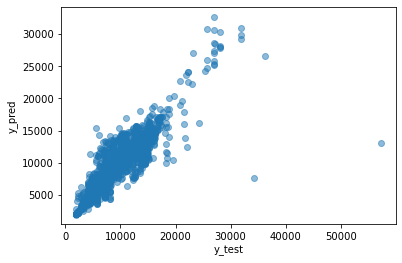

In [37]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [40]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [41]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [42]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25, total=   9.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25, total=   9.0s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25, total=   8.9s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25, total=   9.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=25, total=   9.2s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=  11.1s
[CV] n_estimators=600, min_samples_split=15, min_s

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   1.9s
[CV] n_estimators=600, min_samples_split=2,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [44]:
prediction = rf_random.predict(x_test)

In [45]:
metrics.r2_score(y_test, prediction)

0.8087336729046968

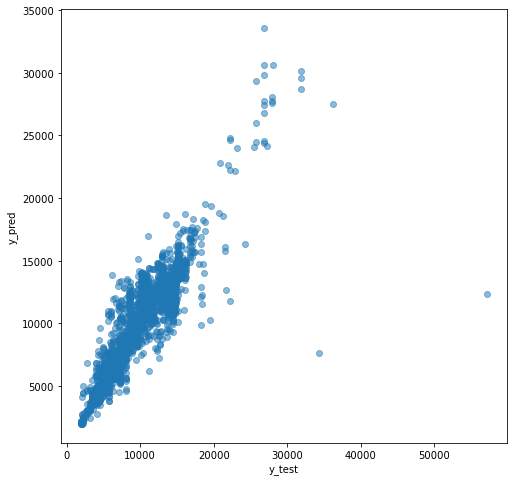

In [46]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1144.9648234482709
MSE: 4124095.3177444795
RMSE: 2030.78687157084


In [81]:
from xgboost import XGBRegressor

In [84]:
xgbr = XGBRegressor()

xgbr.fit(x_train,y_train)

prediction = xgbr.predict(x_test)
print("Accuracy",xgbr.score(x_test,y_test))

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Accuracy 0.834577603867874
MAE: 1158.2945598911112
MSE: 3566847.0226787035
RMSE: 1888.60981218427


In [85]:
import pickle 
pickle_out = open("flight_rf.pkl", mode = "wb") 
pickle.dump(rf_random, pickle_out) 
pickle_out.close()